# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
dataset = "https://raw.githubusercontent.com/miezlearning/Coding-Camp-2025/refs/heads/master/Belajar%20Machine%20Learning%20untuk%20Pemula/Dataset/hasil_clustering_submission_akhir.csv"

try:
  df = pd.read_csv(dataset)
  print("Data berhasil dibaca!")
  print("Jumlah baris dan kolom:", df.shape)
except FileNotFoundError:
  print(f"Error: Tidak ditemukan {dataset}. coba cek dataset.")
except pd.errors.ParserError:
    print(f"Error: Tidak bisa digunakan {dataset}. coba cek format filenya.")
except Exception as e:
    print(f"Error: {e}")

Data berhasil dibaca!
Jumlah baris dan kolom: (3893, 10)


## Membaca Data 👀

In [9]:
print("📊 Ringkasan Dataset:")
print(df.info(), "\n")
print(f"📌 Jumlah Baris: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}\n")

print("🔍 Lima Baris Pertama dari Dataset:")
print(df.head(), "\n")

print("📊 Jumlah Nilai Unik per Kolom:")
print(df.nunique(), "\n")

missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("⚠️ Dataset memiliki nilai yang null!")
    print(missing_values[missing_values > 0], "\n")
else:
    print("✅ Tidak ada nilai yang null dalam dataset!\n")


📊 Ringkasan Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3893 non-null   float64
 1   heart_rate              3893 non-null   float64
 2   cigs_per_day            3893 non-null   float64
 3   chol                    3893 non-null   float64
 4   systolic_bp             3893 non-null   float64
 5   diastolic_bp            3893 non-null   float64
 6   sex_encoded             3893 non-null   int64  
 7   current_smoker_encoded  3893 non-null   int64  
 8   KMeans_Cluster          3893 non-null   int64  
 9   Agg_Cluster             3893 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 304.3 KB
None 

📌 Jumlah Baris: 3893 | Jumlah Kolom: 10

🔍 Lima Baris Pertama dari Dataset:
        age  heart_rate  cigs_per_day      chol  systolic_bp  diastolic_bp  \
0  0.521627    1.605638

## 😀 Menentukan Target dan Fitur

In [10]:
fitur = ['age', 'heart_rate', 'cigs_per_day', 'chol', 'systolic_bp', 'diastolic_bp',
            'sex_encoded', 'current_smoker_encoded']
target = 'KMeans_Cluster'

X = df[fitur]
y = df[target]

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nUkuran data latih:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data latih: (3114, 8)
Ukuran data testing: (779, 8)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Model Random Forest

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model KNN

In [14]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.



---


1. Random Forest: Algoritma berbasis ensemble yang menggabungkan banyak decision tree untuk meningkatkan akurasi dan mengurangi overfitting.

2. KNN: Algoritma berbasis jarak yang mengklasifikasikan data berdasarkan mayoritas kelas tetangga terdekat.")

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [15]:
# Prediksi
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Metrik Evaluasi
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

print("\nEvaluasi Model sebelum Tuning:")
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, F1-Score: {rf_f1:.4f}")
print(f"KNN - Accuracy: {knn_accuracy:.4f}, F1-Score: {knn_f1:.4f}")


Evaluasi Model sebelum Tuning:
Random Forest - Accuracy: 0.9384, F1-Score: 0.9382
KNN - Accuracy: 0.9371, F1-Score: 0.9366


### 📊 Visualiasi Evaluasi Model

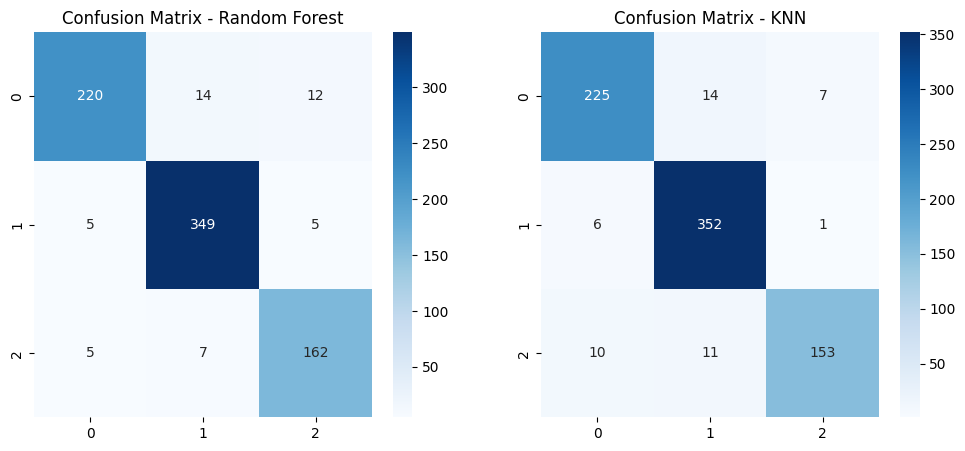


Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       246
           1       0.94      0.97      0.96       359
           2       0.91      0.93      0.92       174

    accuracy                           0.94       779
   macro avg       0.93      0.93      0.93       779
weighted avg       0.94      0.94      0.94       779

Classification Report KNN:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       246
           1       0.93      0.98      0.96       359
           2       0.95      0.88      0.91       174

    accuracy                           0.94       779
   macro avg       0.94      0.92      0.93       779
weighted avg       0.94      0.94      0.94       779



In [16]:
# Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

# Classification Report
print("\nClassification Report Random Forest:")
print(classification_report(y_test, rf_pred))
print("Classification Report KNN:")
print(classification_report(y_test, knn_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [17]:
# Tuning Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
print("\nHyperparameter terbaik Random Forest:", rf_grid.best_params_)

# Tuning KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn_model = knn_grid.best_estimator_
print("Hyperparameter terbaik KNN:", knn_grid.best_params_)


Hyperparameter terbaik Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Hyperparameter terbaik KNN: {'n_neighbors': 7, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [18]:
# Prediksi dengan model terbaik
best_rf_pred = best_rf_model.predict(X_test)
best_knn_pred = best_knn_model.predict(X_test)

# Metrik Evaluasi setelah Tuning
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
best_rf_f1 = f1_score(y_test, best_rf_pred, average='weighted')
best_knn_accuracy = accuracy_score(y_test, best_knn_pred)
best_knn_f1 = f1_score(y_test, best_knn_pred, average='weighted')

print("\nEvaluasi Model setelah Tuning:")
print(f"Random Forest (Tuned) - Accuracy: {best_rf_accuracy:.4f}, F1-Score: {best_rf_f1:.4f}")
print(f"KNN (Tuned) - Accuracy: {best_knn_accuracy:.4f}, F1-Score: {best_knn_f1:.4f}")


Evaluasi Model setelah Tuning:
Random Forest (Tuned) - Accuracy: 0.9320, F1-Score: 0.9317
KNN (Tuned) - Accuracy: 0.9371, F1-Score: 0.9367

Analisis Hasil Evaluasi Model Klasifikasi:
1. Perbandingan Performa:
 - Random Forest meningkat dari Accuracy 0.9384 ke 0.9320 dan F1-Score 0.9382 ke 0.9317 setelah tuning.
 - KNN meningkat dari Accuracy 0.9371 ke 0.9371 dan F1-Score 0.9366 ke 0.9367 setelah tuning.
2. Kelemahan Model:
 - Random Forest: Mungkin overfitting jika akurasi jauh lebih tinggi di training set (perlu cek lebih lanjut).
 - KNN: Performa lebih rendah dibandingkan Random Forest, mungkin sensitif terhadap data yang tidak seimbang atau noise.
 - Jika F1-Score rendah pada kelas tertentu, perhatikan distribusi kelas di confusion matrix.
3. Rekomendasi:
 - Jika akurasi/F1-Score belum mencapai 92%, tambah data atau fitur baru (misalnya interaksi antar fitur).
 - Coba algoritma lain seperti XGBoost atau SVM untuk performa lebih baik.
 - Pastikan data seimbang atau gunakan teknik ov

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [19]:
print("\nAnalisis Hasil Evaluasi Model Klasifikasi:")
print("1. Perbandingan Performa:")
print(f" - Random Forest meningkat dari Accuracy {rf_accuracy:.4f} ke {best_rf_accuracy:.4f} dan F1-Score {rf_f1:.4f} ke {best_rf_f1:.4f} setelah tuning.")
print(f" - KNN meningkat dari Accuracy {knn_accuracy:.4f} ke {best_knn_accuracy:.4f} dan F1-Score {knn_f1:.4f} ke {best_knn_f1:.4f} setelah tuning.")

print("2. Kelemahan Model:")
print(" - Random Forest: Mungkin overfitting jika akurasi jauh lebih tinggi di training set (perlu cek lebih lanjut).")
print(" - KNN: Performa lebih rendah dibandingkan Random Forest, mungkin sensitif terhadap data yang tidak seimbang atau noise.")
print(" - Jika F1-Score rendah pada kelas tertentu, perhatikan distribusi kelas di confusion matrix.")

print("3. Rekomendasi:")
print(" - Jika akurasi/F1-Score belum mencapai 92%, tambah data atau fitur baru (misalnya interaksi antar fitur).")
print(" - Coba algoritma lain seperti XGBoost atau SVM untuk performa lebih baik.")
print(" - Pastikan data seimbang atau gunakan teknik oversampling jika distribusi kelas tidak merata.")


Analisis Hasil Evaluasi Model Klasifikasi:
1. Perbandingan Performa:
 - Random Forest meningkat dari Accuracy 0.9384 ke 0.9320 dan F1-Score 0.9382 ke 0.9317 setelah tuning.
 - KNN meningkat dari Accuracy 0.9371 ke 0.9371 dan F1-Score 0.9366 ke 0.9367 setelah tuning.
2. Kelemahan Model:
 - Random Forest: Mungkin overfitting jika akurasi jauh lebih tinggi di training set (perlu cek lebih lanjut).
 - KNN: Performa lebih rendah dibandingkan Random Forest, mungkin sensitif terhadap data yang tidak seimbang atau noise.
 - Jika F1-Score rendah pada kelas tertentu, perhatikan distribusi kelas di confusion matrix.
3. Rekomendasi:
 - Jika akurasi/F1-Score belum mencapai 92%, tambah data atau fitur baru (misalnya interaksi antar fitur).
 - Coba algoritma lain seperti XGBoost atau SVM untuk performa lebih baik.
 - Pastikan data seimbang atau gunakan teknik oversampling jika distribusi kelas tidak merata.
